# Naive Bayes Models

In this lab you will work with **naive Bayes models**. Naive Bayes models are a surprisingly useful and effective simplification of the general Bayesian models. Naive Bayes models make the naive assumption of statistial independence of the features. In many cases, naive Bayes module are suprisingly effective despite violating the assumption of independence. 

In simple terms, naive Bayes models use emperical distributions of the features to compute probabilities of the labels. The naive Bayes models can use most any family of distributions for the features. It is important to select the correct distribution family for the data you are working with. Common cases are:
- **Gaussian;** for continious or numerical features.
- **Bernoulli;** for features with binary values. 
- **Multinomial;** for features with more than two categories. 

These is one pit fall, the model fails if a zero probability is encountered. This situation occurs when there is a 'hole' in the sample space where there are no samples. A simple smoothing proceedure can deal with this problem. The smoothing hyperparameter, usually called alpha, is one of the few required for naive Bayes models. 

Some properties of naive Bayes models are:
- Computational complexity is linear in number of parameter/features, making naive Bayes models highly scalable. There are out or core approaches suitable for massive datasets.
- Requires minimal data to produce models that generalizes well. If there are only a few cases per category to train a model a naive Bayes model can be a good choice. 
- Have a simple and inherent regularization.

Naive Bayes models are used in many situatons including:

- Document classification
- SPAM detection
- Image classification 



## Example: Iris dataset

As a first example you will use a naive Bayes model to classify the species of iris flowers. 

As a first step, execute the code in the cell below to load the required packages to run the rest of this notebook. 

In [82]:
## Import packages
library(ggplot2)
library(gridExtra)
library(repr)
library(dplyr)
library(caret)
library(e1071)
library(MLmetrics)
library(klaR)

options(repr.plot.width=4, repr.plot.height=4) # Set the initial plot area dimensions

To get a feel for these data, you will now load and plot them. Execute this code and examine the results.  

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


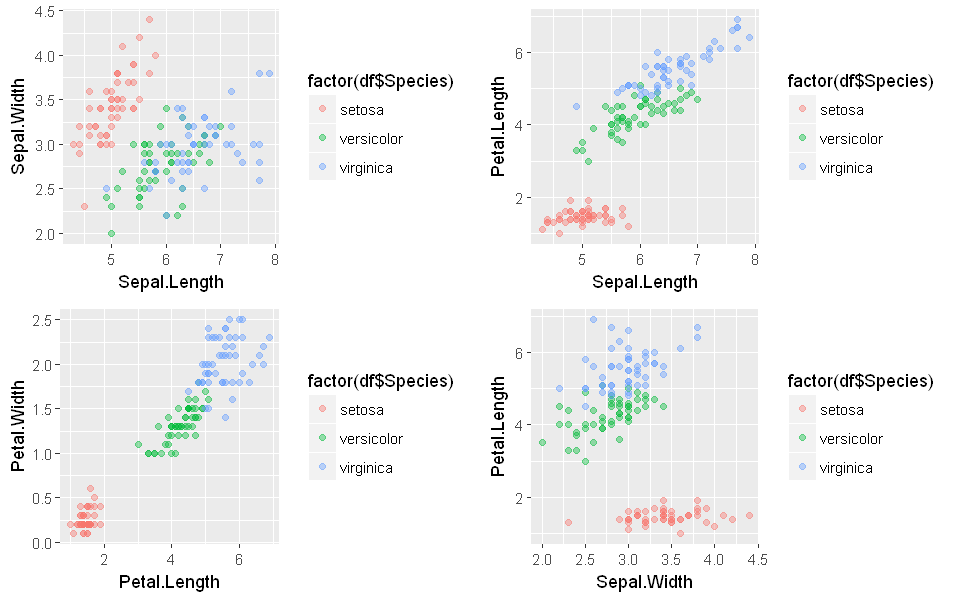

In [64]:
single_plot = function(df, colx, coly){
    ggplot(df, aes_string(colx,coly)) +
          geom_point(aes(color = factor(df$Species)), alpha = 0.4)
}

plot_iris = function(df){
    options(repr.plot.width=8, repr.plot.height=5)
    grid.arrange(
        single_plot(df, 'Sepal.Length', 'Sepal.Width'),
        single_plot(df, 'Sepal.Length', 'Petal.Length'),
        single_plot(df, 'Petal.Length', 'Petal.Width'),
        single_plot(df, 'Sepal.Width', 'Petal.Length'),
        nrow = 2)
}

head(iris, 10)   
plot_iris(iris)  

You can see that Setosa (in red) is well separated from the other two categories. The Versicolor (in green) and the Virginica (in blue) show considerable overlap. The question is how well our classifier will separate these categories. 

Next, execute the code in the cell below to split the dataset into test and training set. Notice that unusually, 67% of the cases are being used as the test dataset. 

In [65]:
set.seed(1955)
## Randomly sample cases to create independent training and test data
partition = createDataPartition(iris[,'Species'], times = 1, p = 0.33, list = FALSE)
training = iris[partition,] # Create the training sample
dim(training)
test = iris[-partition,] # Create the test sample
dim(test)

[1] 51  5

[1] 99  5

As is always the case with machine learning, numeric features  must be scaled. Execute the code in the cell below to scale the training and test datasets:

In [66]:
num_cols = c('Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width')
preProcValues <- preProcess(training[,num_cols], method = c("center", "scale"))

training[,num_cols] = predict(preProcValues, training[,num_cols])
test[,num_cols] = predict(preProcValues, test[,num_cols])
head(training[,num_cols])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
3,-1.2646501,0.4563512,-1.348274,-1.287390
5,-0.9016267,1.4161001,-1.293220,-1.287390
6,-0.4175955,2.1359118,-1.128059,-1.027876
9,-1.6276734,-0.2634605,-1.293220,-1.287390
10,-1.0226345,0.2164140,-1.238167,-1.417146
11,-0.4175955,1.6560373,-1.238167,-1.287390


Now you will define and fit a naive Bayes model. The code in the cell uses the `naiveBayes` function from the e1071 package. The model formula is specified along with the data. Execute this code.

In [67]:
nb_mod = naiveBayes(factor(Species) ~ ., data = training)

Next, the code in the cell below uses the `predict` method is used to compute the multinomial class probabilities from the scaled features. Execute this code. 

In [68]:
test[,'scores'] = predict(nb_mod, newdata = test)
test[1:10,]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,scores
1,-0.78061890,1.17616289,-1.293220,-1.287390,setosa,setosa
2,-1.02263448,-0.02352326,-1.293220,-1.287390,setosa,setosa
4,-1.38565786,0.21641397,-1.238167,-1.287390,setosa,setosa
7,-1.38565786,0.93622566,-1.293220,-1.157633,setosa,setosa
8,-0.90162669,0.93622566,-1.238167,-1.287390,setosa,setosa
12,-1.14364227,0.93622566,-1.183113,-1.287390,setosa,setosa
14,-1.74868124,-0.02352326,-1.458381,-1.417146,setosa,setosa
15,0.06643565,2.37584904,-1.403328,-1.287390,setosa,setosa
16,-0.05457214,3.33559795,-1.238167,-1.027876,setosa,setosa
19,-0.05457214,1.89597458,-1.128059,-1.157633,setosa,setosa


You can see actual species and predicted species. 

It is time to evaluate the model results. Keep in mind that the problem has been made deliberately difficult, by having more test cases than training cases. The iris data has three species categories. Therefore it is necessary to use evaluation code for a three category problem. The function in the cell below extends code from previous labs to deal with a three category problem. Execute this code and examine the results.

In [69]:
print_metrics = function(df, label){
    ## Compute and print the confusion matrix
    cm = as.matrix(table(Actual = df$Species, Predicted = df$scores))
    print(cm)

    ## Compute and print accuracy 
    accuracy = round(sum(sapply(1:nrow(cm), function(i) cm[i,i]))/sum(cm), 3)
    cat('\n')
    cat(paste('Accuracy = ', as.character(accuracy)), '\n \n')                           

    ## Compute and print precision, recall and F1
    precision = sapply(1:nrow(cm), function(i) cm[i,i]/sum(cm[i,]))
    recall = sapply(1:nrow(cm), function(i) cm[i,i]/sum(cm[,i]))    
    F1 = sapply(1:nrow(cm), function(i) 2*(recall[i] * precision[i])/(recall[i] + precision[i]))    
    metrics = sapply(c(precision, recall, F1), round, 3)        
    metrics = t(matrix(metrics, nrow = nrow(cm), ncol = ncol(cm)))       
    dimnames(metrics) = list(c('Precision', 'Recall', 'F1'), unique(test$Species))      
    print(metrics)
}  
print_metrics(test, 'Species')      

            Predicted
Actual       setosa versicolor virginica
  setosa         33          0         0
  versicolor      0         28         5
  virginica       0          3        30

Accuracy =  0.919 
 
          setosa versicolor virginica
Precision      1      0.848     0.909
Recall         1      0.903     0.857
F1             1      0.875     0.882


Examine these results. Notice the following:
1. The confusion matrix has dimension 3X3. You can see that most cases are correctly classified. 
2. The overll accuracy is 0.92. Since the classes are roughly balanced, this metric indicates relatively good performance of the classifier, particularly since it was only trained on 51 cases. 
3. The precision, recall and  F1 for each of the classes is relatively good. Virginica has the worst metrics since it has the largest number of misclassified cases. 

How important are each of the features for this model? The R Caret package provides the capability to find out. As a first step, `gbm` models must be trained using the the Caret `train` function. The code in the cell below does this, using the default model arguments. The default arguments for the model are specified with the `tuneGrid` argument of `train`. Execute the code.

In [70]:
trControl <- trainControl(method = "cv", number = 10)

nb_mod_train = train(factor(Species) ~ ., 
                      data = training, 
                      method = "nb", 
                      trControl = trControl)
nb_mod_train

Naive Bayes 

51 samples
 4 predictor
 3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 45, 45, 45, 46, 45, 47, ... 
Resampling results across tuning parameters:

  usekernel  Accuracy   Kappa
  FALSE      0.9833333  0.975
   TRUE      0.9833333  0.975

Tuning parameter 'fL' was held constant at a value of 0
Tuning
 parameter 'adjust' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were fL = 0, usekernel = FALSE and adjust
 = 1.

With the Caret model object trained, the feature importance can be computed and displayed. Execute this code and examine the results. 

In [71]:
options(repr.plot.width=4, repr.plot.height=3)
imp = varImp(nb_mod_train, scale = FALSE)$importance
imp

,setosa,versicolor,virginica
Sepal.Length,1.0000000,0.9446367,1.0000000
Sepal.Width,0.8961938,0.8961938,0.7283737
Petal.Length,1.0000000,1.0000000,1.0000000
Petal.Width,1.0000000,1.0000000,1.0000000


Examine the table above. Notice that `Sepal.Width` has the least importance for classifying each of the species. 

Execute this code, and answer **Question 1** on the course page.

Next, you will train and evaluate a model using the three most important features by executing the code in the cell below:

In [72]:
nb_mod_3 = naiveBayes(factor(Species) ~ Sepal.Length + Petal.Length + Petal.Width, data = training)
test[,'scores'] = predict(nb_mod_3, newdata = test)
print_metrics(test, 'Species')  

            Predicted
Actual       setosa versicolor virginica
  setosa         33          0         0
  versicolor      0         30         3
  virginica       0          3        30

Accuracy =  0.939 
 
          setosa versicolor virginica
Precision      1      0.909     0.909
Recall         1      0.909     0.909
F1             1      0.909     0.909


These results are slightly better than the for the model with the complete feature set. Naive Bayes models work well with a minimal number of features. Further, the simpler model is preferred since it is likely to generalize better. 

The code in the cell below plots the classes of the iris flower along with the classification errors shown by shape. Execute this code and examine the results.  

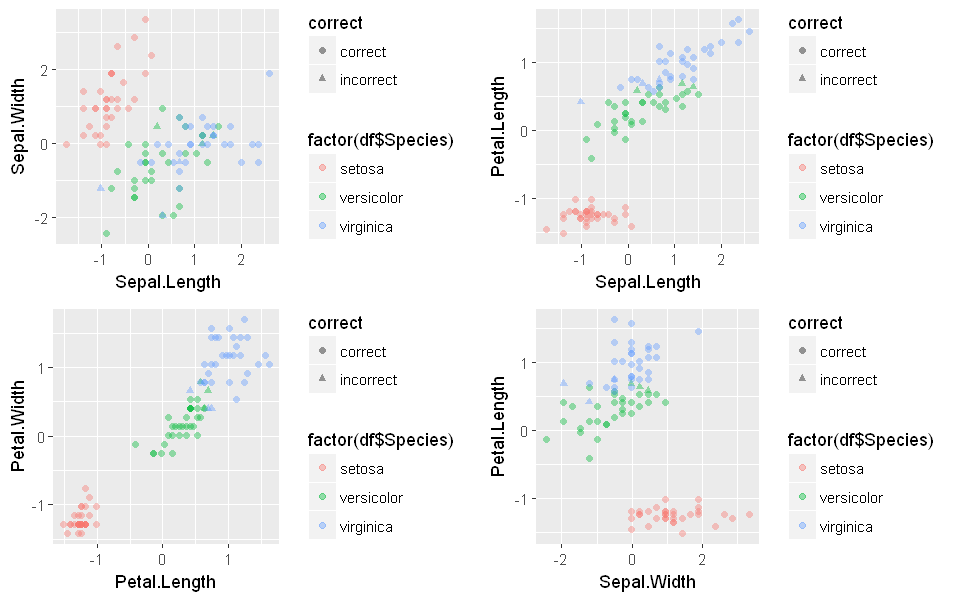

In [73]:
## Create column of correct-incorrect classification
test$correct = ifelse(test$Species == test$scores, 'correct', 'incorrect')

single_plot_classes = function(df, colx, coly){
    ggplot(df, aes_string(colx,coly)) +
          geom_point(aes(color = factor(df$Species), shape = correct), alpha = 0.4)
}

plot_iris_classes = function(df){
    options(repr.plot.width=8, repr.plot.height=5)
    grid.arrange(
        single_plot_classes(df, 'Sepal.Length', 'Sepal.Width'),
        single_plot_classes(df, 'Sepal.Length', 'Petal.Length'),
        single_plot_classes(df, 'Petal.Length', 'Petal.Width'),
        single_plot_classes(df, 'Sepal.Width', 'Petal.Length'),
        nrow = 2)
}

plot_iris_classes(test)

Examine these plots. You can see how the classifier has divided the feature space between the classes. Notice that most of the errors occur in the overlap region between Virginica and Versicolor. This behavior is to be expected.  

## Another example

Now, you will try a more complex example using the credit scoring data. You will use the prepared data which has been prepared by removing duplicate cases. Some columns which are know not to be predictive are removed. Execute the code in the cell below to load the dataset for the example. 

In [74]:
credit = read.csv('German_Credit_Preped.csv', header = TRUE)
## Subset the data frame
credit = credit[,c('checking_account_status', 'loan_duration_mo', 'credit_history', 'loan_amount', 'savings_account_balance',
                   'time_employed_yrs', 'payment_pcnt_income', 'time_in_residence', 'property', 'age_yrs',
                   'other_credit_outstanding', 'number_loans', 'job_category', 'dependents', 'telephone', 'bad_credit' )]
print(dim(credit))
names(credit)

[1] 999  16


[1] "checking_account_status"  "loan_duration_mo"        
 [3] "credit_history"           "loan_amount"             
 [5] "savings_account_balance"  "time_employed_yrs"       
 [7] "payment_pcnt_income"      "time_in_residence"       
 [9] "property"                 "age_yrs"                 
[11] "other_credit_outstanding" "number_loans"            
[13] "job_category"             "dependents"              
[15] "telephone"                "bad_credit"

Cross validation will be used to train the model. Since folds will be selected from the entire dataset the numeric features are scaled in batch. Execute the code in the cell below to accomplish this: 

In [75]:
num_cols = c('loan_duration_mo', 'loan_amount', 'payment_pcnt_income',
             'time_in_residence', 'age_yrs', 'number_loans', 'dependents')

preProcValues <- preProcess(credit[,num_cols], method = c("center", "scale"))
credit[,num_cols] = predict(preProcValues, credit[,num_cols])
head(credit[,num_cols])

loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents
2.2464282,0.9483849,-0.86876113,-0.7645835,-1.19202026,-0.7035652,-0.4283287
-0.7397312,-0.4170067,-0.86876113,0.1414888,1.18945982,-0.7035652,2.3323187
1.7487350,1.6323204,-0.86876113,1.0475610,0.83664795,-0.7035652,2.3323187
0.2556552,0.5655086,0.02505181,1.0475610,1.54227168,1.0276211,2.3323187
1.2510417,2.0477820,-0.86876113,1.0475610,-0.04538171,-0.7035652,2.3323187
0.2556552,-0.1552623,0.02505181,1.0475610,1.54227168,-0.7035652,-0.4283287


The R Caret package computes most performance metrics using the positive cases. For example, recall is a measure of correct classification of positive cases. Therefore, it is important to have the coding of the label correct. The code in the cell below creates a factor (categorical) variable and coerces the levels of the label column, `bad_credit`. Execute this code. 

In [76]:
credit$bad_credit <- ifelse(credit$bad_credit == 0, 'good', 'bad')
credit$bad_credit <- factor(credit$bad_credit, levels = c("bad", "good"))
credit$bad_credit[1:5]

[1] bad  good good bad  good
Levels: bad good

In the results above you can see the new coding of the label column along with the levels, {'bad', 'good'}. 

As the inner loop of a nested cross validation, the code in the cell below uses the capability of the R Caret package to estimate the best hyperparameters using 5 fold cross validation. This first cross validation is performed using ROC as the metric. There are a few points to note here:
1. A Caret `trainControl` object is used to define the 5 fold cross validation. The `twoClassSummary` function is specified, making ROC the metric for hyperparameter optimization. The `nb` model does not accommodate case weights. However, in the case **up-sampling** or **over-sampling** is used. Up-sampling randomly samples the minority case so that the number of classes in each training fold is balanced. 
2. The model is trained using all features as can be seen from the model formula in the Caret `train` function. 
3. `ROC` is specified as a `metric` in the call to `train`. 
4. Weights are specified to help with the class imbalance and the cost imbalance of misclassification of bad credit customers. 
5. The `train` function uses a `tuneGrid` argument to define the hyperparameters to search. 

Execute this code, examine the result, and answer **Question 3** on the course page.

****
**Note:** Naive Bayes models work well with a limited amount of data. However, if there are categorical features with rare categories there will likely be problems with zero probabilities. This condition occurs whenever there are no samples for dummy variable within the sample space of the other features. When this situation occurs, the R naive Bayes model software will generate warning messages, and the algorithm may not converge at all.  

The solution is to use **Laplace smoothing**. This method smooths the conditional probability distribution estimated in the naive Bayes model preventing zero probabilities from occurring. In the naive Bayes software this requires specifing a Laplace smoothing parameter, `fL`, a kernel, `useKernel = TRUE`, and the kernel bandwidth adjustment, `adjust`. Combinations of `fL` and `adjust` must be selected which prevent zero probabilities from occurring.   
****

In [94]:
fitControl <- trainControl(method = "cv",
                           number = 5,
                           sampling = 'up',
                           returnResamp="all",
                           savePredictions = TRUE,
                           classProbs = TRUE,
                           
                           summaryFunction = twoClassSummary)
paramGrid <- expand.grid(fL = c(0.01, 0.05, 0.1), usekernel = c(TRUE), adjust = c(0.5, 1.0))

set.seed(1234)
nb_fit_inside_tw <- train(bad_credit ~ ., 
                          data = credit,  
                          method = "nb", # naive Bayes model 
                          trControl = fitControl,
                          tuneGrid = paramGrid,
                          metric="ROC")
print(nb_fit_inside_tw)

Naive Bayes 

999 samples
 15 predictor
  2 classes: 'bad', 'good' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 800, 799, 799, 799, 799 
Addtional sampling using up-sampling

Resampling results across tuning parameters:

  fL    adjust  ROC        Sens       Spec     
  0.01  0.5     0.7404351  0.7700000  0.6023330
  0.01  1.0     0.7375086  0.7666667  0.5707914
  0.05  0.5     0.7395533  0.8266667  0.5279137
  0.05  1.0     0.7428489  0.8000000  0.5551182
  0.10  0.5     0.7394556  0.8033333  0.5580473
  0.10  1.0     0.7387850  0.8033333  0.5536793

Tuning parameter 'usekernel' was held constant at a value of TRUE
ROC was used to select the optimal model using the largest value.
The final values used for the model were fL = 0.05, usekernel = TRUE and
 adjust = 1.


The grid of hyperpameters searched by the Caret package is over Laplace smoother parameter `fL` and the kernel span parameter `adjust`. The grid along with the ROC and other metrics is shown in the printed table. The ROC and sensitivity (global recall) metrics are good. However, the specificity is rather poor. 

The hyperparameter optimization can also be performed using Recall as a metric. The code in the cell below uses the `prSummary` function for the `summaryFunction` argument for `trainControl` and sets the `metric` as `Recall`. Execute this call and examine the results.

In [95]:
fitControl <- trainControl(method = "cv",
                           number = 5,
                           sampling = 'up',
                           returnResamp="all",
                           savePredictions = TRUE,
                           classProbs = TRUE,
                           summaryFunction = prSummary)
paramGrid <- expand.grid(fL = c(0.01, 0.05, 0.1), usekernel = c(TRUE), adjust = c(0.5, 1.0))

set.seed(1234)
nb_fit_inside_pr <- train(bad_credit ~ ., 
                          data = credit,  
                          method = "nb", # naive Bayes model 
                          trControl = fitControl,
                          tuneGrid = paramGrid,
                          metric="Recall")
print(nb_fit_inside_pr)

Naive Bayes 

999 samples
 15 predictor
  2 classes: 'bad', 'good' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 800, 799, 799, 799, 799 
Addtional sampling using up-sampling

Resampling results across tuning parameters:

  fL    adjust  AUC        Precision  Recall     F        
  0.01  0.5     0.4947595  0.4539920  0.7700000  0.5708361
  0.01  1.0     0.4954684  0.4367045  0.7666667  0.5547217
  0.05  0.5     0.4904395  0.4302866  0.8266667  0.5650642
  0.05  1.0     0.5025037  0.4358064  0.8000000  0.5635320
  0.10  0.5     0.4937278  0.4389113  0.8033333  0.5664003
  0.10  1.0     0.4916329  0.4370469  0.8033333  0.5653917

Tuning parameter 'usekernel' was held constant at a value of TRUE
Recall was used to select the optimal model using the largest value.
The final values used for the model were fL = 0.05, usekernel = TRUE and
 adjust = 0.5.


These resutls are rather poor. The average AUC is barely above 0.5. It is best to stay with the model trained on ROC. 

Given the optimal hyperparameters for the model trained with ROC, which features are the most important? The code in the cell below computes and displays feature importance using the Caret `varImp` function. Execute this code and examine the results. 

ROC curve variable importance

                         Importance
checking_account_status    100.0000
loan_duration_mo            65.4957
savings_account_balance     46.3343
age_yrs                     35.5070
credit_history              28.9269
loan_amount                 27.4488
payment_pcnt_income         21.9452
time_employed_yrs           18.0996
number_loans                12.0787
other_credit_outstanding    12.0442
job_category                 9.6521
telephone                    9.1976
property                     6.7821
time_in_residence            0.3313
dependents                   0.0000


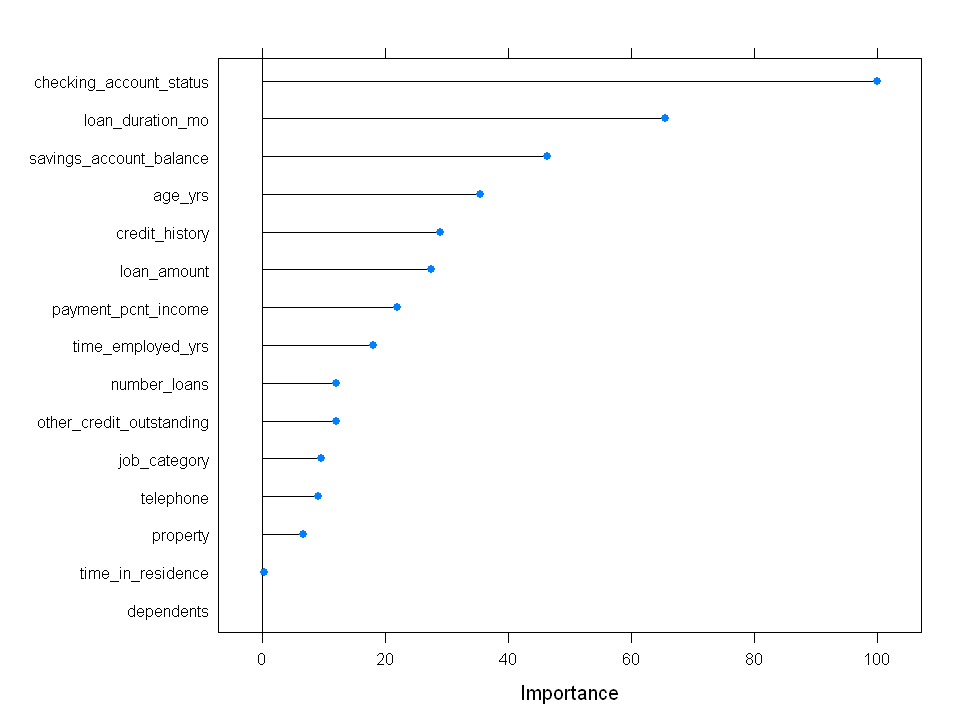

In [96]:
options(repr.plot.width=8, repr.plot.height=6)
var_imp = varImp(nb_fit_inside_tw)
print(var_imp)
plot(var_imp)

It is clear that at least two of the features should be removed from the dataset. Execute the code in the cell below to select the required features and label columns.

****
**Note:** Naive Bayes use estimates of conditional probability and are there less susceptible to over-fitting when compared to most other machine learning models. None the less, removing unimportant features can improve generalization since these features can contain unexpected values or noise.    
****

In [97]:
credit_reduced =  credit[,c('checking_account_status', 'loan_duration_mo', 'credit_history', 'loan_amount', 'savings_account_balance',
                   'time_employed_yrs', 'payment_pcnt_income', 'property', 'age_yrs',
                   'other_credit_outstanding', 'number_loans', 'job_category', 'telephone', 'bad_credit' )]

Execute the code in the cell below to perform the cross validation grid search using ROC as the metric with the reduced feature set: 

In [98]:
fitControl <- trainControl(method = "cv",
                           number = 5,
                           sampling = 'up',
                           returnResamp="all",
                           savePredictions = TRUE,
                           classProbs = TRUE,
                           summaryFunction = twoClassSummary)
paramGrid <- expand.grid(fL = c(0.01, 0.05, 0.1), usekernel = c(TRUE), adjust = c(0.5, 1.0))

set.seed(1234)
nb_fit_inside_tw <- train(bad_credit ~ ., 
                          data = credit_reduced,  
                          method = "nb", # naive Bayes model 
                          trControl = fitControl,
                          tuneGrid = paramGrid,
                          metric="ROC")
print(nb_fit_inside_tw)

Naive Bayes 

999 samples
 13 predictor
  2 classes: 'bad', 'good' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 800, 799, 799, 799, 799 
Addtional sampling using up-sampling

Resampling results across tuning parameters:

  fL    adjust  ROC        Sens       Spec     
  0.01  0.5     0.7406735  0.7733333  0.6023022
  0.01  1.0     0.7394865  0.7800000  0.5722302
  0.05  0.5     0.7399563  0.8400000  0.5293525
  0.05  1.0     0.7445444  0.8033333  0.5536691
  0.10  0.5     0.7421019  0.8000000  0.5680678
  0.10  1.0     0.7396187  0.8066667  0.5565468

Tuning parameter 'usekernel' was held constant at a value of TRUE
ROC was used to select the optimal model using the largest value.
The final values used for the model were fL = 0.05, usekernel = TRUE and
 adjust = 1.


The results of the cross validation grid search with the reduced feature set are nearly the same as the first result. The ROC and sensitivity (global recall) metrics are good. However, the specificity is rather poor. Evidentially, pruning these features was the correct step. This process can be continued, but will not be in this lab in the interest of reducing length. 

To better understand the parameter sweep, execute the code in the cell below to create a chart.

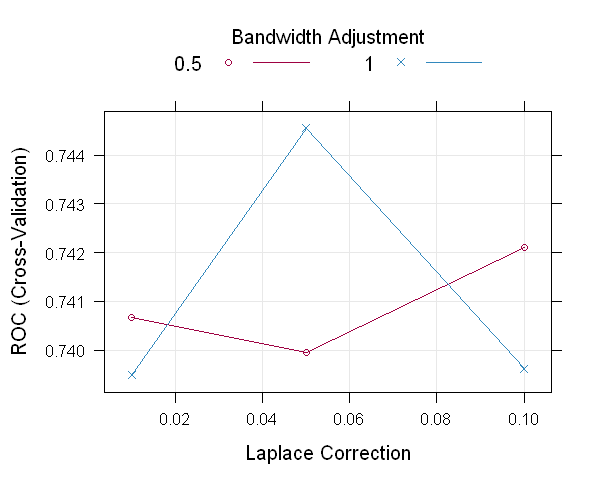

In [99]:
options(repr.plot.width=5, repr.plot.height=4)
trellis.par.set(caretTheme())
plot(nb_fit_inside_tw)

The range of ROC values is rather small. However, the plots shows that both bandwidth adjustment and Laplace correction have a noticeable effect on the model. 

Finally, to verify that the model will generalize well it is time to perform the outside CV loop. The code in the cell below defines a parameter grid with just the optimal hyperparameter values and using ROC as the metric. The CV then repeatedly fits the model with these hyperparameter values. Execute this code and examine the result.

In [100]:
paramGrid <- expand.grid(fL = c(0.05), usekernel = c(TRUE), adjust = c(1.0))

set.seed(1234)
nb_fit_outside_tw <- train(bad_credit ~ ., 
                          data = credit_reduced,  
                          method = "nb", # naive Bayes model 
                          trControl = fitControl,
                          tuneGrid = paramGrid,
                          metric="ROC")

print_metrics = function(mod){
    means = c(apply(mod$resample[,1:3], 2, mean), fL = mod$resample[1,4], usekernel = mod$resample[1,5], 
              adjust = mod$resample[1,6],Resample = 'Mean')
    stds = c(apply(mod$resample[,1:3], 2, sd), fL = mod$resample[1,4], usekernel = mod$resample[1,5], 
              adjust = mod$resample[1,6],Resample = 'Mean', Resample = 'STD')
    out = rbind(mod$resample, means, stds)
    out[,1:3] = lapply(out[,1:3], function(x) round(as.numeric(x), 3))
    out
}
print_metrics(nb_fit_outside_tw)

ROC,Sens,Spec,fL,usekernel,adjust,Resample
0.762,0.800,0.597,0.05,TRUE,1,Fold1
0.693,0.683,0.607,0.05,TRUE,1,Fold2
0.781,0.833,0.493,0.05,TRUE,1,Fold3
0.720,0.750,0.571,0.05,TRUE,1,Fold4
0.768,0.917,0.436,0.05,TRUE,1,Fold5
0.745,0.797,0.541,0.05,TRUE,1,Mean
0.037,0.088,0.074,0.05,TRUE,1,Mean


Examine these results. As before, ROC and sensitivity are good, whereas specificity is poor. Notice that the standard deviation of the mean of the AUC are approximately an order of magnitude smaller than the mean. This indicates that this model is likely to generalize well. 

***
**Note:** The predict method can be used with this optimal model to classify unknown cases.
***

## Summary

In this lab you have accomplished the following:
1. Used a naive Bayes classifier for the iris dataset. The classification of the multiple species was reasonably effective. 
2. Fit a Gaussian naive Bayes model on the bank credit data. This model required hyperparameter choices that ensured sufficient Laplace smoothing to prevent zero conditional probabilities from occurring.
3. To deal with the label class imbalance up-sampling was used. The specificity metric was poor regardless. 
4. Applied feature importance was used for feature selection. The model created and evaluated with the reduced feature set had essentially the same performance as the model with more features. 
5. Used the outer loop of the nested cross validation to demonstrate that the model is likely to generalize.